In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Set your working directory

Example: 
```python
os.chdir("/Users/sheng/Jupyter/AESHM_579/Decision_Tree")  # for Mac

os.chdir("C:\\Users\\sheng\\Jupyter\\AESHM_579")  # for Windows

```


In [3]:
# Set your working directory

### Your code here:

os.chdir("/Users/kausshik/HON322M/Lab4")

### End of your code

### Read in data

Example:

```python
df = pd.read_csv('weather.csv', index_col=0)
```

In [4]:
# Read the csv file 

### Your code here:

df = pd.read_csv("weather.csv")

### End of your code

In [5]:
df

,Unnamed: 0,Outlook,Temp,Humidity,Windy,Play
0,0,Sunny,Hot,High,False,No
1,1,Sunny,Hot,High,True,No
2,2,Overcast,Hot,High,False,Yes
3,3,Rainy,Mild,High,False,Yes
4,4,Rainy,Cool,Normal,False,Yes
5,5,Rainy,Cool,Normal,True,No
6,6,Overcast,Cool,Normal,True,Yes
7,7,Sunny,Mild,High,False,No
8,8,Sunny,Cool,Normal,False,Yes
9,9,Rainy,Mild,Normal,False,Yes


In [6]:
# Transform categorical variables into numerical form
label_encoder = LabelEncoder()
df['Outlook'] = label_encoder.fit_transform(df['Outlook'])
df['Temp'] = label_encoder.fit_transform(df['Temp'])
df['Humidity'] = label_encoder.fit_transform(df['Humidity'])
df['Windy'] = label_encoder.fit_transform(df['Windy'])
df['Play'] = label_encoder.fit_transform(df['Play'])

In [7]:
df

,Unnamed: 0,Outlook,Temp,Humidity,Windy,Play
0,0,2,1,0,0,0
1,1,2,1,0,1,0
2,2,0,1,0,0,1
3,3,1,2,0,0,1
4,4,1,0,1,0,1
5,5,1,0,1,1,0
6,6,0,0,1,1,1
7,7,2,2,0,0,0
8,8,2,0,1,0,1
9,9,1,2,1,0,1


In [8]:
# Set X (features) and y (target) variables

### Your code here:
X = df.drop('Play', axis=1)
y = df['Play']


### End of your code


In [10]:
# Initialize NB Classifier and fit the model

### Your code here:
nb = CategoricalNB()

nb.fit(X, y)

### End of your code


CategoricalNB()

In [11]:
# Predict training data points

### Your code here:
y_pred = nb.predict(X)

### End of your code


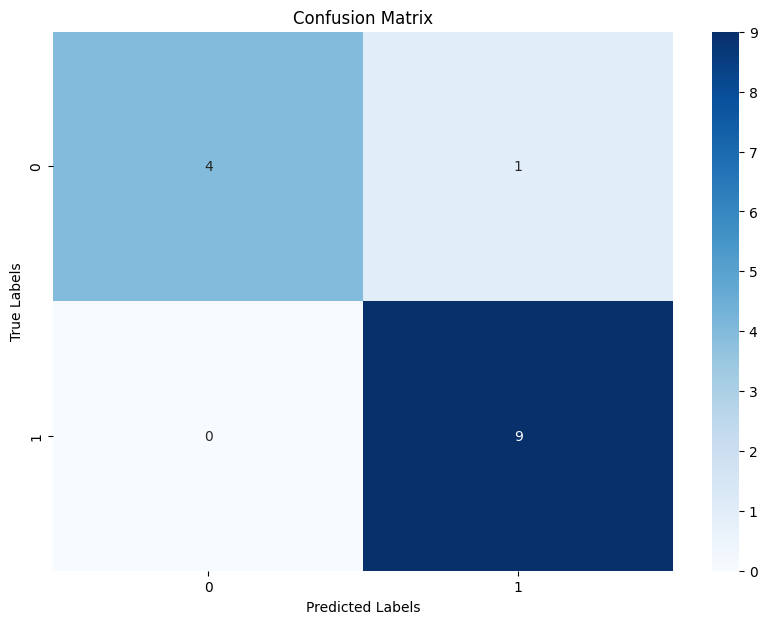

In [12]:
# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [13]:
# Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9285714285714286


In [14]:
# Classification report: precision, recall, ff1-score, and accuracy

### Your code here:
report = classification_report(y, y_pred)

### End of your code

print(report)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



## Split data into training and test datasets, train a model on trianing data, and evaluate it on test data

In [15]:
# Split data into training data and test data

### Your code here:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=7)


### End of your code


In [16]:
train_x

,Unnamed: 0,Outlook,Temp,Humidity,Windy
1,1,2,1,0,1
13,13,1,2,0,1
8,8,2,0,1,0
7,7,2,2,0,0
10,10,2,2,1,1
3,3,1,2,0,0
6,6,0,0,1,1
9,9,1,2,1,0
4,4,1,0,1,0


In [17]:
test_x

,Unnamed: 0,Outlook,Temp,Humidity,Windy
12,12,0,1,1,0
11,11,0,2,0,1
2,2,0,1,0,0
5,5,1,0,1,1
0,0,2,1,0,0


In [18]:
train_y

1     0
13    0
8     1
7     0
10    1
3     1
6     1
9     1
4     1
Name: Play, dtype: int64

In [19]:
test_y

12    1
11    1
2     1
5     0
0     0
Name: Play, dtype: int64

In [20]:
# Initialize the Naive Bayes Classifier, fit the model on training data, predict on test data

### Your code here:
nb = CategoricalNB()

nb.fit(train_x, train_y)

y_pred = nb.predict(test_x)

### End of your code

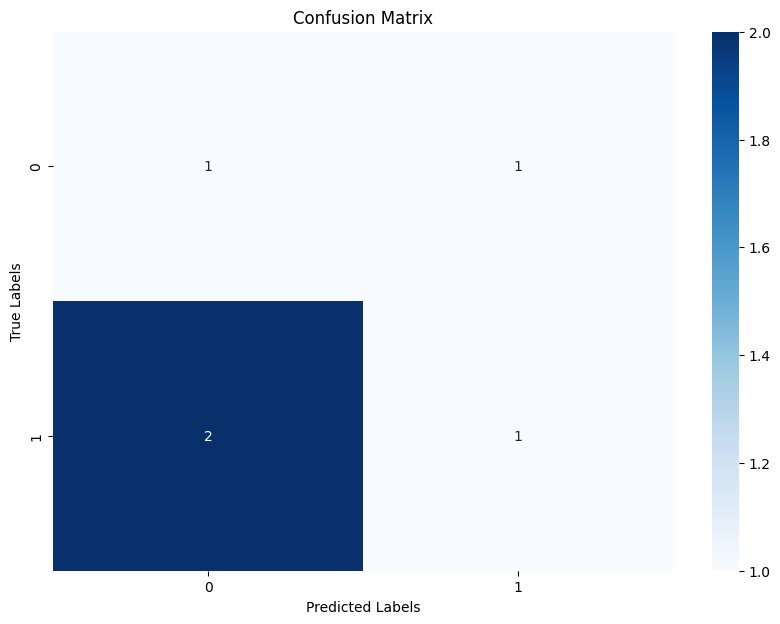

In [21]:
# Confusion matrix and classification report

conf_matrix = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [22]:
# Classification report: precision, recall, ff1-score, and accuracy

### Your code here:
report = classification_report(test_y, y_pred)

### End of your code

print(report)

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.50      0.33      0.40         3

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5

